# Packages

In [2]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [4]:
import sys
sys.path.append('/home/divar/projects/geometric-sampling')
import geometric_sampling

In [5]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



In [6]:
%%R
#install.packages("sampling")
library(sampling)

# Parameters

In [7]:
%%R
n = 5

In [8]:
num_new_nodes          = 30

# Simu The best

## R Popu

In [9]:
%%R
library(sampling)

#MU284 Sweden
data(MU284)
print(length(MU284[,1]))
MU284 = MU284[MU284$P85<200,]
#MU284 = MU284[-c(245,270),]
print(length(MU284[,1]))
set.seed(120)
MU284 = MU284[sample(length(MU284[,1])),]
#MU284 = MU284[order(-MU284$ME84),]
y5 = MU284$RMT85
x5 = MU284$P85/100
g5 = MU284$P75/100
v5 = MU284$S82/1000
h5 = MU284$ME84/1000
w5 = MU284$REV84/1000


RMT85 = MU284$RMT85
P85 = MU284$P85/sd(MU284$P85)
P75 = MU284$P75/sd(MU284$P75)
S82 = MU284$S82/sd(MU284$S82)
CS82 = MU284$CS82/sd(MU284$CS82)
SS82 = MU284$SS82/sd(MU284$SS82)
ME84 = MU284$ME84/sd(MU284$ME84)
REV84 = MU284$REV84/sd(MU284$REV84)
REG = MU284$REG

P85 = MU284$P85
P75 = MU284$P75
S82 = MU284$S82
CS82 = MU284$CS82
SS82 = MU284$SS82
ME84 = MU284$ME84
REV84 = MU284$REV84
REG = MU284$REG
RMT85 = MU284$RMT85






N = length(REV84)
r <- runif(N, .1, .8)
e <- rep (1, N)






 y <- RMT85; z <- CS82; p <- SS82



N = length(y)

print(n/N)
pik <- inclusionprobabilities(p, n)
##########################
### Variance of Rivals ###
##########################
pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])

print(c(var__srs_y,var__srs))

[1] 284
[1] 281
[1] 0.01779359
[1] 621156846.5    332794.5


In [10]:
%%R
# Sample data
# y <- your_response_vector
# z <- your_predictor_vector

# 1. Fit up to cubic model (z, z^2, z^3)
model <- lm(y ~ poly(z, 3, raw=TRUE))

# 2. Check summary and retain only significant terms
print(summary(model))

print('adsfasdfasdf')
# 3. Identify significant terms (p < 0.05)
coefs <- summary(model)$coefficients
sig_terms <- rownames(coefs)[which(coefs[,4] < 0.05)]
sig_terms <- sig_terms[sig_terms != "(Intercept)"]

# 4. Build formula for significant terms:
terms <- c()
if("poly(z, 3, raw = TRUE)1" %in% sig_terms) terms <- c(terms, "z")
if("poly(z, 3, raw = TRUE)2" %in% sig_terms) terms <- c(terms, "I(z^2)")
if("poly(z, 3, raw = TRUE)3" %in% sig_terms) terms <- c(terms, "I(z^3)")

# 5. Fit reduced model
if(length(terms) > 0){
  formula_str <- paste("y ~", paste(terms, collapse = " + "))
  final_model <- lm(as.formula(formula_str))
  summary(final_model)
} else {
  cat("No significant terms found.\n")
}


Call:
lm(formula = y ~ poly(z, 3, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-371.45  -68.53  -19.08   40.02  698.92 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             195.15011   56.70775   3.441 0.000668 ***
poly(z, 3, raw = TRUE)1 -58.69774   18.39547  -3.191 0.001582 ** 
poly(z, 3, raw = TRUE)2   7.84073    1.74775   4.486 1.06e-05 ***
poly(z, 3, raw = TRUE)3  -0.19892    0.04832  -4.117 5.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 145.5 on 277 degrees of freedom
Multiple R-squared:  0.4768,	Adjusted R-squared:  0.4711 
F-statistic: 84.13 on 3 and 277 DF,  p-value: < 2.2e-16

[1] "adsfasdfasdf"

Call:
lm(formula = as.formula(formula_str))

Residuals:
    Min      1Q  Median      3Q     Max 
-371.45  -68.53  -19.08   40.02  698.92 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 195.15011   56.70775   3.441 0.000

 0.02671  0.31839 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.0135495  0.0197108  -0.687   0.4924    
poly(z, 3, raw = TRUE)1  0.1145654  0.0175117   6.542 2.92e-10 ***
poly(z, 3, raw = TRUE)2 -0.0066922  0.0037594  -1.780   0.0762 .  
poly(z, 3, raw = TRUE)3  0.0004575  0.0002169   2.109   0.0358 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09749 on 277 degrees of freedom
Multiple R-squared:  0.8379,	Adjusted R-squared:  0.8362 
F-statistic: 477.4 on 3 and 277 DF,  p-value: < 2.2e-16

[1] "adsfasdfasdf"

Call:
lm(formula = as.formula(formula_str))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76883 -0.01219  0.00415  0.02980  0.29691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.531e-02  1.126e-02   1.360   0.1750    
z           8.453e-02  4.708e-03  17.955   <2e-16 ***
I(z^3)      7.866e-05  4.195e-05   1.875   0

Model 1 (y ~ z):
  alpha (Intercept): -64.3714 (p=0.001146)
  beta  (Slope)    : 28.4048 (p=3.64e-36)

Model 2 (y/pik ~ z/pik):
  alpha (Intercept): 4533.8417 (p=6.6e-10)
  beta  (Slope)    : 9.3784 (p=1.903e-17)

Model 3 (y ~ y/pik):
  alpha (Intercept): -32.0473 (p=0.000327)
  beta  (Slope)    : 0.0226 (p=6.505e-96)

Model 4 (z ~ z/pik):
  alpha (Intercept): 4.1630 (p=3.086e-30)
  beta  (Slope)    : 0.0085 (p=3.403e-49)



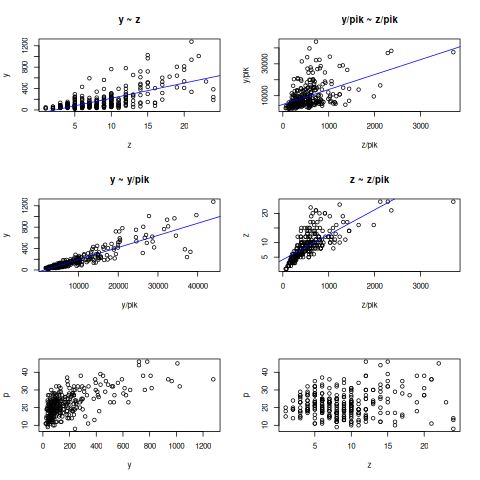

In [11]:
%%R
models <- list(
  lm(y ~ z),
  lm(I(y/pik) ~ I(z/pik)),
  lm(y ~ I(y/pik)),
  lm(z ~ I(z/pik))
)
model_names <- c("y ~ z", "y/pik ~ z/pik", "y ~ y/pik", "z ~ z/pik")

for(i in 1:4) {
  sm <- summary(models[[i]])
  cat(sprintf("Model %d (%s):\n", i, model_names[i]))
  cat(sprintf("  alpha (Intercept): %.4f (p=%.4g)\n", sm$coefficients[1,1], sm$coefficients[1,4]))
  cat(sprintf("  beta  (Slope)    : %.4f (p=%.4g)\n", sm$coefficients[2,1], sm$coefficients[2,4]))
  cat("\n")
}

# 2x2 plot of all models
par(mfrow = c(3,2))
plot(z, y, main="y ~ z"); abline(models[[1]], col="blue")
plot(z/pik, y/pik, main="y/pik ~ z/pik"); abline(models[[2]], col="blue")
plot(y/pik, y, main="y ~ y/pik"); abline(models[[3]], col="blue")
plot(z/pik, z, main="z ~ z/pik"); abline(models[[4]], col="blue")
plot(y, p)
plot(z, p)

In [12]:
%%R
Ppi <- function(Pi) {
  
  N <- length(Pi)
  #SOME ERROR MESSAGES
  if (N < 2) {
    rlang::abort("The sampling designs should be define on a set of more than one element. (length(Pi) > 1)")
  }
  
  for (k in 1:N) {
    if (Pi[k] >= 1 | Pi[k] <= 0) {
      rlang::abort("Pi is not a vector of probabilities (0 <= p < 1)")
    }
  }
  
  if (as.integer(round( sum(Pi) , 9)) - round( sum(Pi) , 9) != 0) {
    rlang::abort("The sum of the first order inclusion probabilities should be an integer")
  }
  
  
  s <- c()
  c <- c()
  kr <- c()
  alpha <-c()
  sum <-0
  r<-1
  r_prev<-0
  n_<-sum(Pi)
  
  for (k in 1:N) {
    prev_sum<-sum
    sum<-sum+Pi[k]
    if (sum>=r)
    {
      kr[r] <- k
      alpha[k] <-r-prev_sum
      
      int <- sqrt( (1 - Pi[k]) / (1 - alpha[k]) )
      s[k] <- round(int, 8)
      r_prev<-r
      r<-r+1
    }
    
    else {
      inter <- sqrt( Pi[k] / (r_prev + 1 - prev_sum) )
      s[k] <- round(inter, digits = 15)
    }
    
    c[k] <- sqrt(1 - s[k]^2)
    
  }
  
  # ce point n'est pas joli, mais je n'ai pas trouvé l'erreur. A retravailler..
  #print(kr)
  if(max(kr)!=length(Pi)){
    kr<-cbind(kr,length(Pi))
    r<-r+1
    r_prev<-r_prev+1}
  #print(kr)
  V <- matrix(0, nrow = N , ncol = r_prev)
  V[1, 1] = 1
  if ((r_prev-1) != 0) {
    for (r in 1:(r_prev-1)) {
      V[kr[r] + 1, r + 1] = 1
    }
  }
  
  for (k in 1:(N-1)) {
    L <- V[k, ]
    M <- V[k + 1,]
    V[k, ] <- s[k] * L - c[k] * M
    V[k + 1, ] <- c[k] * L + s[k] * M
  }
  return(V)
}




Drawing_Dsd <- function(v, s = 1, B = FALSE, seed = NULL){
  
  
  if (is.numeric(v)) {
    return(.dsd_sampling_mult(v, s, B, seed))
  }
  else{ return(.dsd_sampling_mult_complex(v, s, B, seed))}
}


.dsd_sampling_mult_complex <- function(v, s, B, seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C_complex(v, B, seed))
  }
  
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C_complex(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}


.dsd_sampling_mult <- function(v = NULL, s, B,seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C(v, B, seed))
  }
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}

.dsd_sampling_01_B_C_complex <- function(v, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #Step 1: Sampling the first element
  w <- v
  
  total <- 0
  i <- 0
  pi1 <- Re( diag( v %*% t(Conj(v)) ) )
  
  if (length(pi1[pi1 < 0]) != 0 | length(pi1[pi1 >= 1]) != 0) {
    rlang::abort("The matrix v given as input doesn't suit to the input expected (See the functions pgd and periodic_dsd)")
  }
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  M <- v[i,]
  e1 <- M / c(Re (sqrt (t(M) %*% Conj(M)) ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- v %*% Conj(e1)
    pi1 <- pi1 - t(inter * Conj(inter))
    pi2 <- Re( 1 / r*pi1 )
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    w <- w - t( t(Conj(e1)) %*% t(w) ) %*% t(e1)
    L <- w[i, ]
    e1 <- L / c(Re(sqrt (t(L) %*% Conj(L) )))
    
  }
  
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}
.dsd_sampling_01_B_C <- function(v = NULL, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #First step: Sampling the first element
  w <- v
  
  
  total <- 0
  i <- 0
  pi1 <- diag(v  %*% t(v))
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  
  l <- v[i,]
  e1 <- l / as.numeric( sqrt( t(l) %*% l ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- (v %*% e1)
    pi1 <- pi1 - t( inter * inter )
    pi2 <- 1 / r * pi1
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    
    w <- w - (w %*% e1) %*% t(e1)
    L <- w[i,]
    e1 <- L / as.numeric( sqrt( t(L) %*% L ))
    
  }
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}

In [13]:
%%R
library(sampling)



#pik <- inclusionprobabilities(p, n)

sort_index <- order(z / pik, decreasing = TRUE)
y <- y[sort_index]; z <- z[sort_index]; pik <- pik[sort_index]
N <- length(y)
print(cor(y,z))
print(cor(y,p))


Base <- Ppi(pik)
Ppi_mat <- Base %*% t(Base)

# Variance matrix formula
Dpi_inv <- diag(1 / pik)
I_N <- diag(N)
A <- (I_N - Ppi_mat) * Ppi_mat
var_ht_z <- as.numeric(t(z) %*% Dpi_inv %*% A %*% Dpi_inv %*% z)
cat("Variance of HT estimator via DSD formula_z: ", var_ht_z, "\n")

var_ht <- as.numeric(t(y) %*% Dpi_inv %*% A %*% Dpi_inv %*% y)
cat("Variance of HT estimator via DSD formula: ", var_ht, "\n")


# Monte Carlo
# Number of repetitions
m <- 2000
ht_estimates_dsd_y <- numeric(m)
ht_estimates_dsd_z <- numeric(m)
ht_estimates_cube_y <- numeric(m)
ht_estimates_cube_z <- numeric(m)

for (i in 1:m) {
  # --- Determinantal Sampling ---
  samp <- Drawing_Dsd(Base, s = n, B = TRUE)
  sel_idx <- which(samp[, 1] == 1)  # Adjust if needed
  ht_estimates_dsd_y[i] <- sum(y[sel_idx] / pik[sel_idx])
  ht_estimates_dsd_z[i] <- sum(z[sel_idx] / pik[sel_idx])
  
  # --- Cube Method Sampling ---
  # If you want to balance on z, make sure to use cube method with z in the auxiliary matrix
  cube_sample <- samplecube(cbind(pik, z), pik, comment = FALSE)
  sel_cube <- which(cube_sample == 1)
  ht_estimates_cube_y[i] <- sum(y[sel_cube] / pik[sel_cube])
  ht_estimates_cube_z[i] <- sum(z[sel_cube] / pik[sel_cube])
}
var_y_0 = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0)
threshold_y = min(var_y_0)

# --- Variance and Mean calculations ---
var_dsd_y   <- var(ht_estimates_dsd_y)
var_cube_y  <- var(ht_estimates_cube_y)
var_dsd_z   <- var(ht_estimates_dsd_z)
var_cube_z  <- var(ht_estimates_cube_z)
mean_dsd_y  <- mean(ht_estimates_dsd_y)
mean_cube_y <- mean(ht_estimates_cube_y)
mean_dsd_z  <- mean(ht_estimates_dsd_z)
mean_cube_z <- mean(ht_estimates_cube_z)

cat("Here is the Vincent Efficiency y:\n")
eff_dsd_y <- min(var_y_0[var_y_0>0]) / var_ht
eff_dsd_z <- min(var_z_0[var_z_0>0]) / var_ht_z
cat(sprintf("  DSD_y:  %.5f\n  DSD_z: %.5f\n", eff_dsd_y, eff_dsd_z))


cat("Monte Carlo variance of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_y, var_cube_y))

eff_dsd_y <- min(var_y_0) / var_dsd_y
eff_cube_y <- min(var_y_0) / var_cube_y

cat("Monte Carlo efficiency of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_y, eff_cube_y))

cat("Monte Carlo mean of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_y, mean_cube_y))
cat(sprintf("  Actual total of y: %.5f\n", sum(y)))

cat("\nMonte Carlo variance of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_z, var_cube_z))

eff_dsd_z <- min(var_z_0) / var_dsd_z
eff_cube_z <- min(var_z_0) / var_cube_z

cat("Monte Carlo efficiency of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_z, eff_cube_z))

cat("Monte Carlo mean of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_z, mean_cube_z))
cat(sprintf("  Actual total of z: %.5f\n", sum(z)))

[1] 0.6574759
[1] 0.1130297
Variance of HT estimator via DSD formula_z:  162900.1 
Variance of HT estimator via DSD formula:  272413389 
Here is the Vincent Efficiency y:
  DSD_y:  1.19547
  DSD_z: 2.04294
Monte Carlo variance of HT estimator for y:
  DSD:  272275770.55787
  Cube: 290920025.40021
Monte Carlo efficiency of HT estimator for y:
  DSD:  1.19608
  Cube: 1.11942
Monte Carlo mean of HT estimator for y:
  DSD:  53161.52019
  Cube: 53278.89515
  Actual total of y: 53151.00000

Monte Carlo variance of HT estimator for z:
  DSD:  175463.75804
  Cube: 236720.78184
Monte Carlo efficiency of HT estimator for z:
  DSD:  1.89666
  Cube: 1.40585
Monte Carlo mean of HT estimator for z:
  DSD:  2503.37940
  Cube: 2523.39653
  Actual total of z: 2508.00000


In [14]:
%%R
results = round(c(var__srs/min(var_z_0), var__srs/var_cube_z, var__srs/var_ht_z,  var__srs_y/min(var_y_0), var__srs_y/var_cube_y,var__srs_y/var_ht ),2)
names(results) = c('eff_GFS_0_z','eff_cube_z', 'eff_dsd_z', 'eff_GFS_0_y' , 'eff_cube_y','eff_dsd_y')
print(results)

eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       1.00        1.41        2.04        1.91        2.14        2.28 


## Astar

/tmp/ipykernel_853012/2965922855.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  swap_units             = int(N/5)


cor(y, z) 0.6574759317818598
cor(y, inclusions) 0.6506643745639386
[281] [5.] adsfa
4000 30 200000 0.7 0.9


Generating initial designs: 100%|█████████████████| 1/1 [00:00<00:00, 19.05it/s]

Initial design 0: method = Original, efficiency z = 0.5762, y=0.9353
New best at idx=0: method = Original, efficiency z = 0.5762 and efficiency y = 0.9353

Progress: 0.0% 


=== Best Solution Updated at Iteration 0 ===
  Balancing Method:    origine
  Real and E(.) z,y:   2508→2508.0, 53151→53151.0
  Best Cost (z):       282627.039
  Best Cost (y):       298437548.4282
  number of new noded: 30
  rho (z, y):          0.657
  rho (z_hat, y_hat):  0.478
  rho (p, y):          0.651
  Criteria Value:      117.105
  Efficiency z (0→f):  0.576 → 0.576 → dsd 0.5764→ cube 0.8376
  Efficiency y (0→f):  0.935 → 0.935 → dsd 0.9128→ cube 0.9748
  Efficiency z (srs):  1.173 → 0.576 → 1.1733
  Efficiency y (srs):  2.125 → 0.935 → 2.074
  Alpha:               0.8673817962177037
  Num changes:         3
  Design Depth:        3
  Design Size (|D|):   287
  Open set size:       15

Progress: 0.0% 
=== Best Solution Updated at Iteration 1 ===
  Balancing Method:    origine
  Real and E(.) z,y:   2508→2508.0, 53151→53151.0
  Best Cost (z):       282453.443
  Best Cost (y):       297727267.663
  number of new noded: 30
  rho (z, y):          0.657
  rho (z_hat, y_hat):  0.4

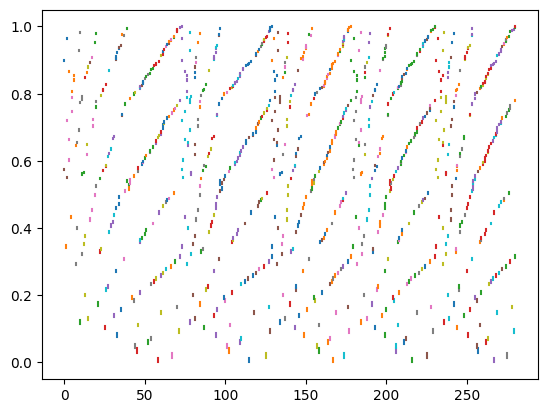

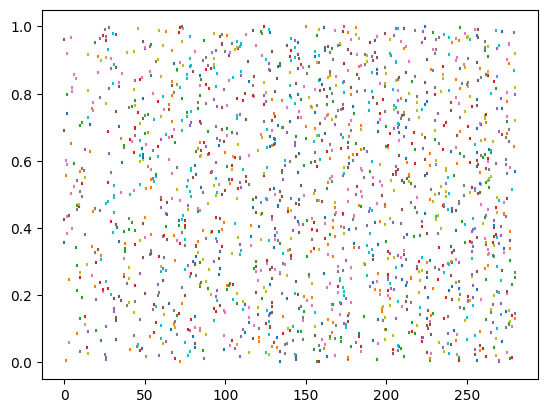

In [15]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
inclusions = np.array(ro.r['pik'])

print('cor(y, z)', np.corrcoef(y, z)[0, 1])
print('cor(y, inclusions)', np.corrcoef(y, inclusions)[0, 1])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
print(N,n,'adsfa')
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])
eff_dsd_z = float(ro.r['eff_dsd_z'][0])
eff_dsd_y = float(ro.r['eff_dsd_y'][0])
inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht'][0])


threshold_z_cube = float(ro.r['var_cube_z'][0])
threshold_y_cube = float(ro.r['var_cube_y'][0])


inclusions = np.array(inclusions)

import numpy as np


num_changes_lower      = 1
num_changes_upper      = 3
max_open_set_size      = 200000
switch_lower           = .7
switch_upper           = .9
max_iterations         = 4000
num_initial_nodes      = 1
initial_design_to_use  = 1
num_top_restart_nodes  = 10
stuck_fraction         = 0.99

swap_iterations        = int(np.round(.7 * num_initial_nodes))  # ensure integer!
swap_distance          = 3
swap_units             = int(N/5)







show_results           = 1
random_restart_period  = 10000   # how often to inject random designs
random_injection_count = 500     # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = 0  # how much of the variance to expect in the best design



rng = np.random.default_rng()  # Recommended for controlled/stable random runs
print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)

# You must define y, z, inclusions, threshold_z, threshold_y earlier in your notebook or script.

# Criterion must be set up per your class structure.
criterion = VarNHT(main_variable=y, auxiliary_variable=z, 
                   inclusion_probability=inclusions, balance_method='linear')

astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
        threshold_z_cube             = threshold_z_cube,
    threshold_y_cube             = threshold_y_cube,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                
    # atomize                 = False,                        
    # delta                   = 0.01,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

In [16]:
#print(inclusions)
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        if k in item.ids:
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
        #print(item)
    
    if not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yes')
print(prob)

size of init design 281
size of best design 1449
117.14400031694026
66.55696195505739


/tmp/ipykernel_853012/1240027416.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for k in range(int(N)):


1.0000000080000013
